# Laboration maskininlärning AI21


## 2. Disease prediction
### 2.0 - EDA uppvärmning


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import PercentFormatter

C:\Users\ErikLarsson-AIU21GBG\.virtualenvs\Maskininl-rning-r3O2cMsS\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df_cardio = pd.read_csv("Data/cardio_train.csv", sep=";").set_index("id")
df_cardio["age_years"] = (df_cardio["age"] / 365.25)

df_cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.357290
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.381246
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.627652
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.249144
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.841205


In [3]:
df_cardio.query("weight >=200" )#"height < 120 and height >= 000")


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,,
618,16765,1,186,200.0,130,70,1,1,0,0,0,0,45.900068
71945,15117,2,180,200.0,150,90,1,1,0,0,1,1,41.388090



#### a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?


<AxesSubplot:xlabel='cardio', ylabel='count'>

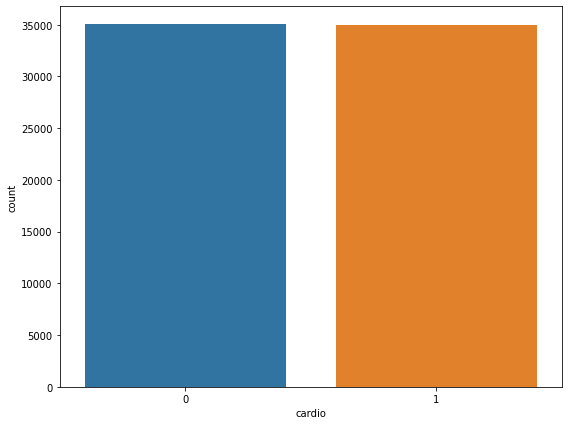

In [4]:
plt.figure(figsize = [9, 7])
sns.countplot(x=df_cardio["cardio"])
# Lika många i båda grupperna


#### b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.


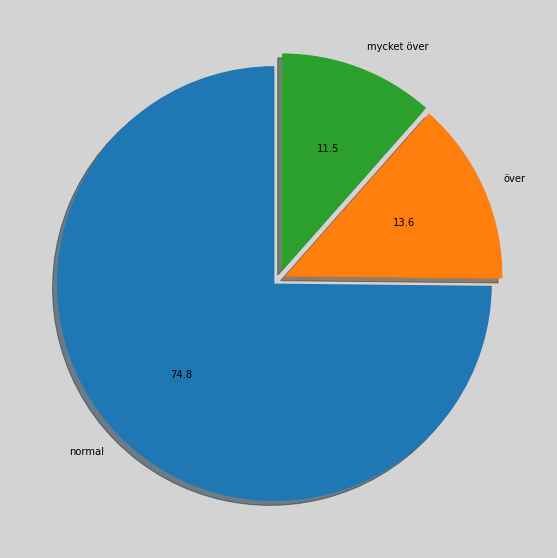

In [5]:

fig  = plt.figure(figsize = [10, 10])
plt.pie(df_cardio["cholesterol"].value_counts(), labels = ("normal", "över", "mycket över"), autopct="%.1f", startangle=90, explode=(0.03, 0.03, 0.04), shadow=True, )

fig.set_facecolor('lightgrey')


#### c) Hur ser åldersfördelningen ut? Rita ett histogram.


In [6]:

def histogram(df, feature, binwidth=1 ):
    bin_range = (np.floor(df[feature].min()), np.floor(df_cardio[feature].max())) 
    bin_range = (bin_range[0] - bin_range[0] % binwidth, bin_range[1] - bin_range[1] % binwidth + binwidth)
    
    print("bin_range:", bin_range )
    plt.figure(figsize = [10, 10])
    sns.histplot(df_cardio, x=feature, binrange=bin_range,  binwidth=binwidth)


bin_range: (29.0, 65.0)


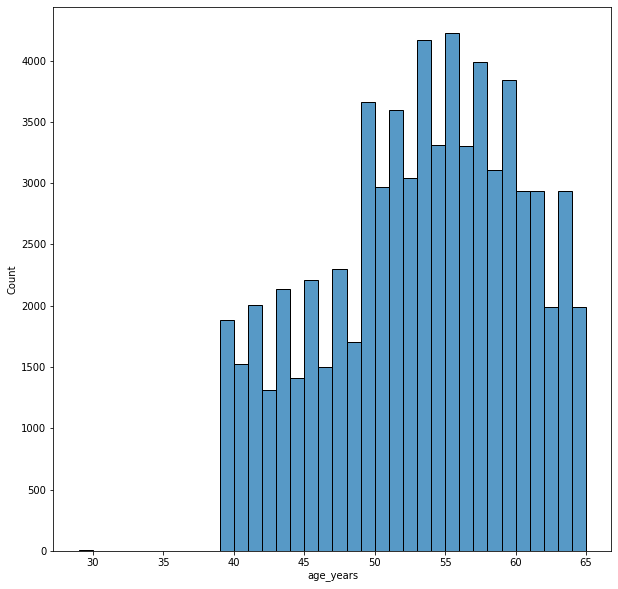

In [7]:
histogram(df_cardio, "age_years")


#### d) Hur stor andel röker?


In [ ]:

fig  = plt.figure(figsize = [10, 10])
plt.pie(df_cardio["smoke"].value_counts(), labels = ("No cool", "Cool"), autopct="%.1f", startangle=90, explode=(0.05, 0.05), shadow=True, )

fig.set_facecolor('lightgrey')



#### e) Hur ser viktfördelningen ut? Rita lämpligt diagram.


bin_range: (10.0, 205.0)


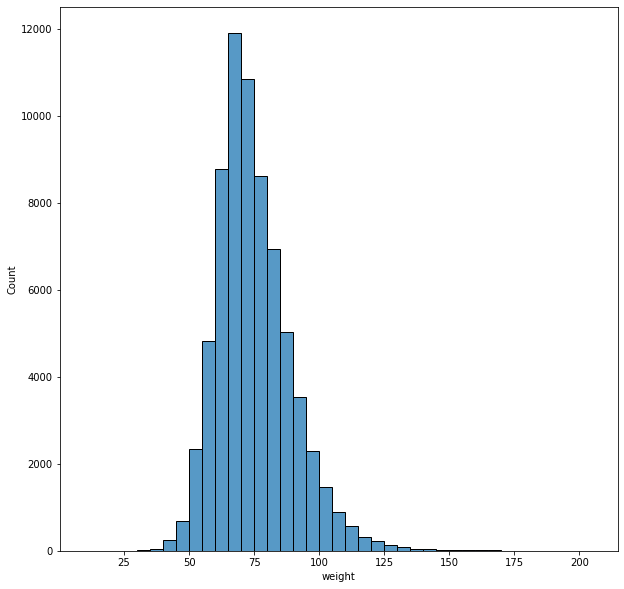

In [8]:

histogram(df_cardio, "weight", 5)


#### f) Hur ser längdfördelningen ut? Rita lämpligt diagram.


In [ ]:
histogram(df_cardio, "height", 5)


#### g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram


In [14]:

df_cardio_2 = df_cardio.copy()
df_cardio_2["gender"] = "female"
df_cardio_2["gender"][df_cardio["gender"] == 2] = "male"

df_cardio_2["gender"]


C:\Users\ErikLarsson-AIU21GBG\AppData\Local\Temp\ipykernel_17948\794659787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cardio_2["gender"][df_cardio["gender"] == 2] = "male"


id
0          male
1        female
2        female
3          male
4        female
          ...  
99993      male
99995    female
99996      male
99998    female
99999    female
Name: gender, Length: 70000, dtype: object

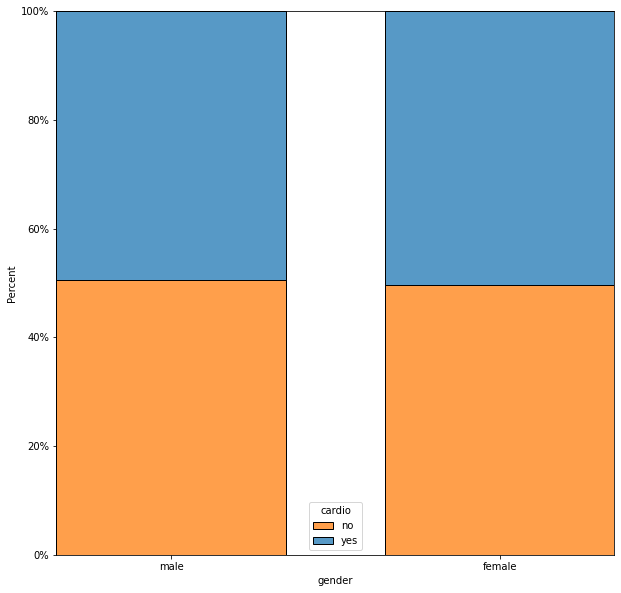

In [11]:
fig  = plt.figure(figsize = [10, 10])

ax = sns.histplot(df_cardio_2, x="gender", hue= "cardio", stat="percent", multiple="fill", shrink=0.7 , )
ax.xaxis.set
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(["no", "yes"], title="cardio");
